## Анализ программы лояльности магазина строительных материалов «Строили, строили и наконец построили»

**Ссылки на материалы**

Презентация в папке с тетрадкой

Дашборд <https://public.tableau.com/app/profile/stepan.semyanov/viz/Shop_16813819911510/sheet1?publish=yes>

<b> Описание данных: </b>

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

## Введение
<b> Краткое описание проекта: </b>

<b> Цель проекта: </b> Проанализировать программу лояльности магазина.

<b>План работы: </b> </b> <a id="cell0"></a>

[1. Загрузить данные и ознакомиться с ними ](#cell1)   
    
    
[2. Провести предобработку данных при необходимости: ](#cell2)
    -	заменить названия столбцов
    -	привести в соответствие типы данных (дата, время и т.д.)
    -	определить пропуски, аномальные значения, принять решение по их обработке (в т.ч. определить есть ли id покупателей которые попадают в группу, участвующую в программе лояльности, так и не участвующую)
    -	обработать дубликаты
    -	принять решение по покупателям без customer_id (возможно сделать "заглушку" для дальнейшего анализа)
    
    
3. Провести исследовательский анализ данных: 

   [3.1 Данные датафрейма `product`: ](#cell4)
    - посмотреть id товара с нулевой стоимостью, определить к какому типу товаров могут относится такие идентификаторы
    - определить имеются ли разные цены на один и тот же товар. Принять решение какую цену (среднюю, медина и т.п.) мы будем использовать в дальнейшем, в т.ч. для соединения с датафреймом retail

   [3.2 Данные датафрейма `retail`: ](#cell5)
    - соединить таблицы по id товара, 
    - определить количество магазинов в сети, оценить продажи (количество, сумма, средний чек) в различных магазинах сети. Выявить возможные особенности магазинов в зависимости от проводимых операций. 
    - сгруппировать по id покупателя, а также по чекам, для дальнейшего анализа данных
    - разделить клиентов на участвующих в программе лояльности и не участвующих, определить доли от общего числа покупателей
    - проанализировать клиентов, попробовать выделить наличие корпоративных покупателей
    - определить временной интервал, за который представлены данные (даты начала и окончания)
    - определить товары с отрицательным количеством и количеством равным 0 (ориентировочно определить: "-" это возвраты, "0" - это услуги либо что-то иное), разделить датафрейм на 2 (положительное количество товаров и все остальные)
    - Пострить график сумм заказов на различных временных промежутках (по дням\неделям)



[4. 	Проведите анализ программы лояльности (сравнить показатели участников программы лояльности и остальных покупателей): ](#cell6)

    -	найти средний чек
    -	найти среднее количество заказов
    -	сравнить LTV


[5. Проверка статистических гипотез: ](#cell7)

    - проверка гипотезы_1: средний чек участников программы лояльности выше, чем у остальных покупателей
    - проверка гипотезы_2: среднее количество заказов у участников программы лояльности выше, чем у остальных покупателей
    
    
[6. Итоги исследования (выводы и рекомендации)](#cell8)

    -	описать имеющиеся данные и проведенную по ним обработку
    -	выводы по анализу программы лояльности
    -	вывод по итогам проверки статистических гипотез
    -	рекомендации по итогам проведенного анализа.    

## 1. Загрузка и знакомство с данными   <a id="cell1"></a>  <font size = 2>[к оглавлению](#cell0)</font>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Загружаем датафрейм, в т.ч. со ссылкой на внешний источник

In [2]:
retail = pd.read_csv('retail_dataset.csv')
product = pd.read_csv('product_codes.csv')

Изучим датафрейм `retail_dataset`
Посмотрим первые 10 строк датафрейма

In [3]:
retail.head(10)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0
5,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1.0
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,Shop 0,1.0


Выведем основную информацию о датафрейме

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


Посмотрим на число уникальных значений в наших данных

In [5]:
for col in ['purchaseid', 'item_ID', 'CustomerID', 'ShopID', 'loyalty_program']:
    print('Количество уникальных значений', col, ':', retail[col].nunique())

Количество уникальных значений purchaseid : 4894
Количество уникальных значений item_ID : 3159
Количество уникальных значений CustomerID : 1749
Количество уникальных значений ShopID : 31
Количество уникальных значений loyalty_program : 2


Изучим датафрейм `product_codes`
Посмотрим первые 10 строк датафрейма

In [6]:
product.head(10)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


Выведем основную информацию о датафрейме

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


Посмотрим на число уникальных значений productID

In [8]:
print('Количество уникальных значений productID :', product['productID'].nunique())

Количество уникальных значений productID : 3159


**Вывод по загрузке и первичному анализу данных:**

**датафрейм** `retail_dataset`
В датафрейм собрана информация о 105 335 купленных товарах в магазине, при этом записи являются строками в чеках, соответсвенно количество покупок(чеков) меньше.  Типы данных в ряде случаев не соответсвуют хранимому содержимому, для дальнейшей работы необходимо их менять.

В id покупателя (`CustomerID`) имеется большое количество пропусков.

В нашем распоряжении информация о:
 - 4 894 чеках, 
 - 3 159 уникальных товаров, 
 - 1 749 уникальных идентифицированных покупателях,
 - 31 магазине
 - 2-х статусах в программе лояльности
 
**датафрейм** `product_codes`
В датафрейме представлена информация о ценах 9969 продуктов, причем только 31 59 из них уникальны, что может свидетальствовать либо наличии дубликатов, либо о различных ценах на один и тот же продукт. Учитывая, что в датафрейме не содержится информация о датах присвеония цен для дальнейшего исследования придется определять какую цену мы будем использовать. В дальнейшем при сборе данных целесообразно фиксировать дату присвоения цены, а также делать привязку цены к программе лояльности, если она идет со скидкой.

### 2. Предобработка данных <a id="cell2"></a>  <font size = 2>[к оглавлению](#cell0)</font>

Приведем названия столбцов к стилистически более верному виду

In [9]:
retail.rename(columns = {'purchaseid':'purchase_id', 'item_ID':'item_id','Quantity':'quantity',\
                         'purchasedate':'purchase_date', 'CustomerID':'customer_id', 'ShopID':'shop_id'}, inplace = True )
product.rename(columns = {'productID':'item_id'}, inplace = True )

Заполним пропуски в столбце `customer_id` на id чеков. Таким образом мы не потеряем уникальные покупки.

In [10]:
retail['customer_id'] = retail['customer_id'].fillna(retail['item_id'])

Приведем в соответсвие типы данных

In [11]:
retail['purchase_date'] = pd.to_datetime(retail['purchase_date']) # преобразование данных о времени

retail['loyalty_program'] = retail['loyalty_program'].astype(int) # преобразование данных с типом программы лояльности

Попытка преобразования purchase_id, item_id, customer_id к типу int приводит к ошибке, т.к. в раде id используются помимо чисел и буквенные значения

Cделаем приведение букв к нижнему регистру, а также удалим возможные пробелы, чтобы выявить возможные дубликаты

In [12]:
for i in ['purchase_id','item_id', 'shop_id']:
    retail[i] = retail[i].str.lower() 
    retail[i] = retail[i].str.strip() 
    retail[i] = retail[i].str.replace('ё', 'е')

Определил наличие явных дубликатов в датафреймах

In [13]:
print('Количество явных дубликатов в retail_dataset:', retail.duplicated().sum())
print('Количество явных дубликатов в product_codes:', product.duplicated().sum())

Количество явных дубликатов в retail_dataset: 1033
Количество явных дубликатов в product_codes: 0


Удалим явные дубликаты

In [14]:
retail.drop_duplicates(inplace = True)

Посмотрим на общую статистику датафрейма `retail_dataset`

In [15]:
retail.describe()

,quantity,loyalty_program
count,104302.000000,104302.000000
mean,7.883003,0.224464
std,329.565540,0.417231
min,-74216.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,7.000000,0.000000
max,74214.000000,1.000000


Посмотрим на выбросы

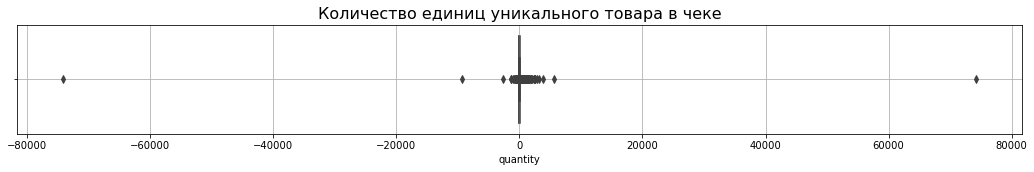

In [16]:
plt.figure(figsize=(18, 2)) 
ax = sns.boxplot(x = 'quantity',  data=retail, showfliers=True, orient='h')
plt.title('Количество единиц уникального товара в чеке', size = 16)
plt.grid()
plt.show()

Посмотрим на выбросы в разрезе магазинов

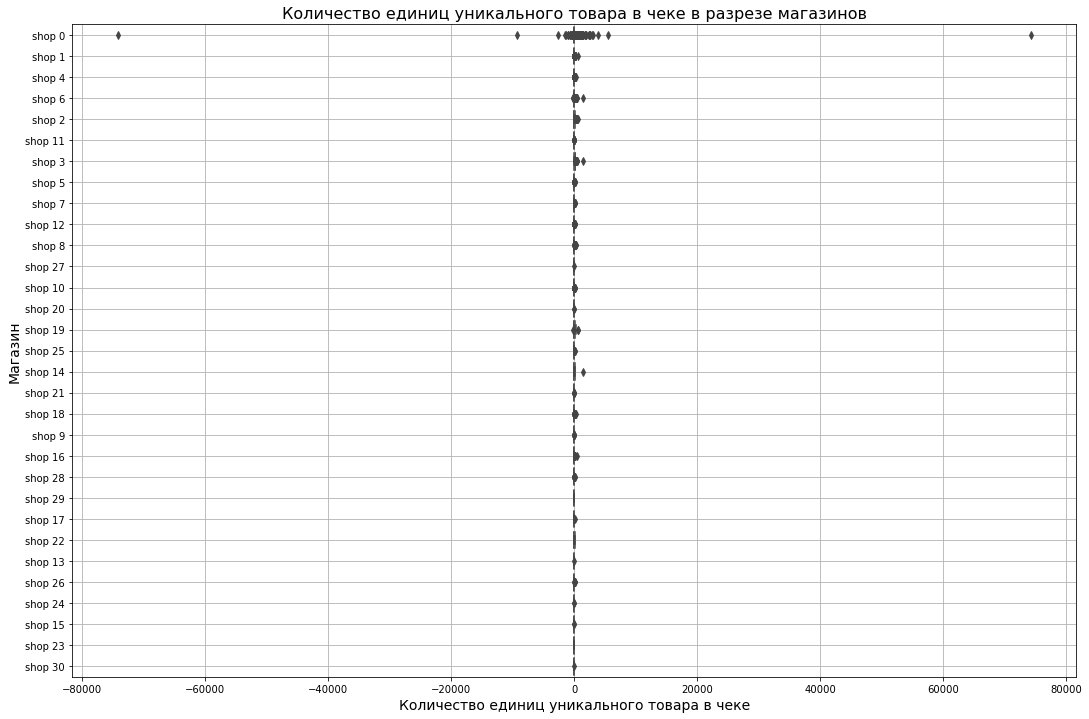

In [17]:
plt.figure(figsize=(18, 12))
ax = sns.boxplot(x = 'quantity', y = 'shop_id', data=retail, showfliers=True, orient='h')
plt.title('Количество единиц уникального товара в чеке в разрезе магазинов', size = 16)
plt.ylabel('Магазин', size = 14)
plt.xlabel('Количество единиц уникального товара в чеке', size = 14)
plt.grid()
plt.show()

**Наибольший разброс наблюдается в shop 0**

А теперь посмотрим на количество единиц товара в чеке без учета выбросов

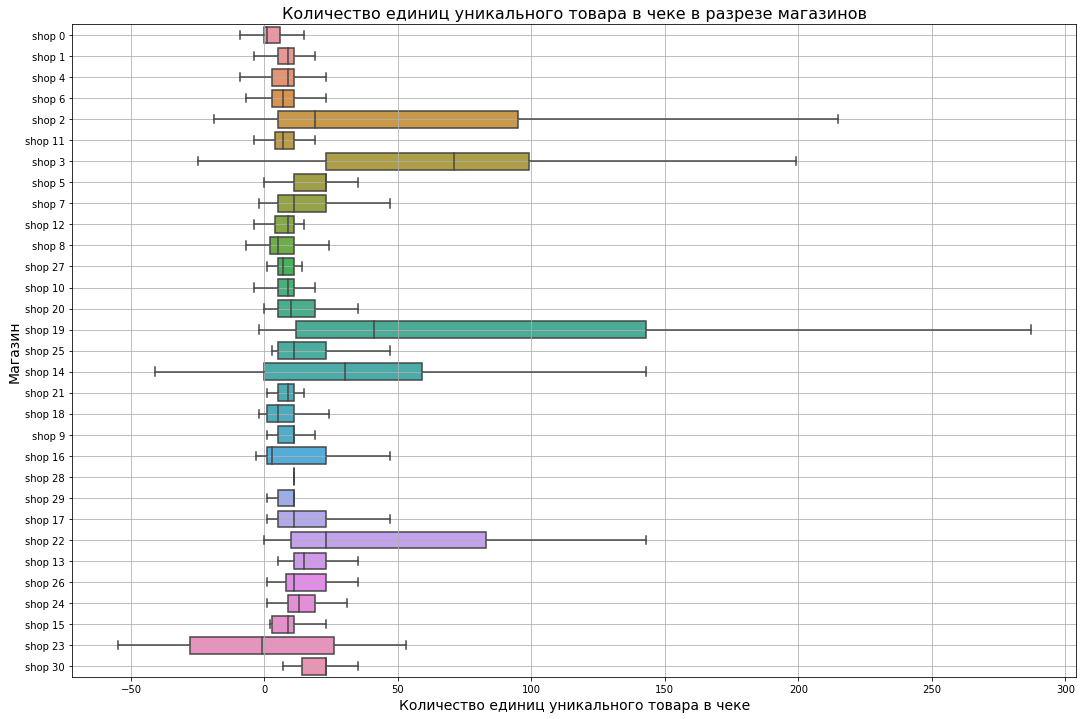

In [18]:
plt.figure(figsize=(18, 12))
ax = sns.boxplot(x = 'quantity', y = 'shop_id', data=retail, showfliers=False, orient='h')
plt.title('Количество единиц уникального товара в чеке в разрезе магазинов', size = 16)
plt.ylabel('Магазин', size = 14)
plt.xlabel('Количество единиц уникального товара в чеке', size = 14)
plt.grid()
plt.show()

Разделим данные, с положительным и отрицательным количеством товаров

In [19]:
retail_plus = retail.query('quantity > 0')
retail_minus = retail.query('quantity < 0')

In [20]:
retail_minus.head(20)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,c539944,22776,-2,2016-12-23 11:38:00,20239.0,shop 0,0
109,c542910,20726,-2,2017-02-01 15:38:00,23190.0,shop 0,1
112,c542426,22418,-25,2017-01-28 09:32:00,19825.0,shop 0,0
253,c539726,22791,-11,2016-12-21 14:24:00,22686.0,shop 0,1
344,c544034,21878,-2,2017-02-15 11:28:00,20380.0,shop 0,0
458,c539667,21285,-25,2016-12-21 10:47:00,18827.0,shop 0,0
468,537032,21275,-31,2016-12-03 16:50:00,21275,shop 0,0
503,540119,22865,-61,2017-01-05 10:07:00,22865,shop 0,0
636,c543764,79191d,-13,2017-02-11 15:16:00,22714.0,shop 0,1
660,c537602,22423,-3,2016-12-07 12:45:00,23190.0,shop 0,1


**По количеству заказов видно, что есть отрицательные значения, много 0 значений, а также выбросы с большим количеством товаров в чеке. Отрицательные значения могут быть как возвратами, так и ошибочными чеками. 
Для анализа программы лояльности нам не нужны данные с отрицательными и 0 значениями количетства товаров, т.к. это не влияет на объем продаж и размер среднего чека, поэто удалим такие данные**

Определим сколько данных в которых имеются выбросы по количеству товаров (> 250)

In [21]:
retail_analiz = retail_plus.query('quantity < 250')

In [22]:
print('Число позиций с аномальным количеством товаров:', len(retail_plus) - len(retail_analiz))
print('Доля позиций с аномальным количеством товаров от общего числа в очищенных данных:',\
      (len(retail_plus) - len(retail_analiz))/len(retail_plus))

Число позиций с аномальным количеством товаров: 217
Доля позиций с аномальным количеством товаров от общего числа в очищенных данных: 0.003106034581472575


**Число позиций с выбросами не велико, поэтому можем их удалить**

Проверим есть ли попадания покупателей одновременно в группу программы лояльности и без

In [23]:
len(np.intersect1d(retail.query('loyalty_program == "1.0"')['customer_id'].unique(),\
                   retail.query('loyalty_program == "0.0"')['customer_id'].unique()))

0

Пересечений нет, соответсвенно покупатель представлен только в одной категории

Посмотрим сколько у нас осталось данных по итогам предобработки

In [24]:
print('Число позиций с аномальным количеством товаров:', len(retail) - len(retail_analiz))
print('Доля позиций с аномальным количеством товаров от общего числа в очищенных данных:',\
      (len(retail) - len(retail_analiz))/len(retail))

Число позиций с аномальным количеством товаров: 34655
Доля позиций с аномальным количеством товаров от общего числа в очищенных данных: 0.3322563325727215


В итоге мы удалили порядка 33% данных, за счет исключения дубликатов и строк с аномальными значениями по количеству товаров в позиции

**Вывод по предобработке данных:** 

    - Мы привели названия столбцов к стилистически более верному виду, привели к правильному типу данных столбец данными и идентификатор программы лояльности.
    - Удалили явные дубликаты.
    - Разделили датафрейм на части по значению количества товаров в чеке (отрицательное\положеительное)
    - Удалили записи с аномально высоким количеством уникальных товаров (более 250) в строке чека
После предобработки данных количество записей, которые мы будем использовать для дальнейшего анализа снизилось на 33% от первоначального количества.

## 3. Исследовательский анализ данных: 

   **3.1 Данные датафрейма `product`**: <a id="cell4"></a>  <font size = 2>[к оглавлению](#cell0)</font>

Посмотрим есть ли у нас товары с 0 ценой

In [25]:
len(product.query('price_per_one == 0'))

382

так как товары с нулевой стоимостью не влияют на выручку удалим эти записи

In [26]:
product = product.query('price_per_one != 0')

Посмотрим, существенно ли отличаются цены на один и тот же товар

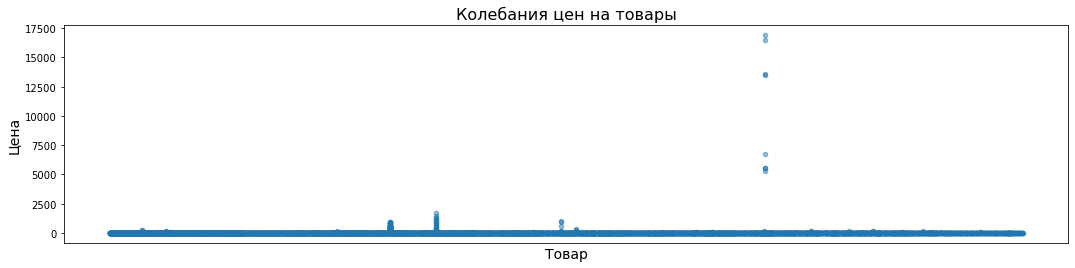

In [27]:
product.plot(x='item_id', y='price_per_one', figsize =(18,4), kind='scatter', alpha = 0.5)
plt.title('Колебания цен на товары', size = 16)
plt.xticks([]) # убиараем подписи по оси х
plt.ylabel('Цена', size = 14)
plt.xlabel('Товар', size = 14)
plt.show()

Посмотрим, что за товары, по которым цена существенно отличается

In [28]:
product.query('price_per_one >500')

,item_id,price_per_one
1203,DOT,569.77
1866,DOT,607.49
2655,DOT,887.52
3427,DOT,863.74
3541,DOT,940.87
3773,DOT,950.99
3882,M,924.59
3900,M,631.31
3931,AMAZONFEE,13541.33
4015,DOT,836.14


Проверим, встречаются ли данные обозначения в строках чеков

In [29]:
len(retail_analiz.query('item_id in ("AMAZONFEE", "M", "DOT", "BANK CHARGES")'))

0

**Таких обозначений нет, вероятно это технические обозначения, банковской комииссии и т.п. Для анализа программы лояльности они нам не пригодятся, а также они не перенесутся при объединении датафреймов.**

**Товаров с 0 ценой достаточно много, возможно это подарки в рамках программы лояльности либо какие-то услуги. Учитываятот факт, что при анализе данных мы выявили, что количество на один товар может приходиться несколько разных цен, а среди них, вероятно могут быть колебания, то целесообразно взять медианное значение цены для дальнейшего анализа**

Определим для дальнейшего анализа цену одной единицы товара, как медианную

In [30]:
product_median = product.groupby('item_id').agg({'price_per_one': 'median'}).reset_index()
product_median

,item_id,price_per_one
0,10002,1.630
1,10080,0.850
2,10120,0.210
3,10123C,0.650
4,10124A,0.420
...,...,...
3097,gift_0001_20,16.845
3098,gift_0001_30,25.265
3099,gift_0001_40,34.040
3100,gift_0001_50,42.550


**3.2 Данные датафрейма `retail_analiz`:** <a id="cell5"></a>  <font size = 2>[к оглавлению](#cell0)</font>

Объединим таблицы `retail_analiz` и `product_median` по id товару

In [31]:
retail_analiz = retail_analiz.merge(product_median, on = 'item_id')

Добавим столбец с сумарной стоиммостью товаров по строке в чеке

In [32]:
retail_analiz['price_sum'] = retail_analiz['price_per_one']*retail_analiz['quantity']
retail_analiz

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,price_sum
0,538280,21873,11,2016-12-10 12:50:00,18427.0,shop 0,0,1.630,17.930
1,540418,21873,1,2017-01-07 11:04:00,21873,shop 0,0,1.630,1.630
2,541516,21873,2,2017-01-18 17:34:00,21873,shop 0,0,1.630,3.260
3,541566,21873,35,2017-01-19 11:50:00,23401.0,shop 0,1,1.630,57.050
4,538843,21873,1,2016-12-14 13:18:00,21712.0,shop 0,0,1.630,1.630
...,...,...,...,...,...,...,...,...,...
64500,544571,22541,23,2017-02-21 13:07:00,20825.0,shop 0,0,0.635,14.605
64501,541848,90073,1,2017-01-23 13:31:00,23290.0,shop 0,1,5.020,5.020
64502,542398,85047,1,2017-01-27 15:36:00,18853.0,shop 0,0,5.950,5.950
64503,542617,20731,2,2017-01-30 15:48:00,23142.0,shop 0,1,1.250,2.500


Оценим продажи (количество, сумма, средний чек) в различных магазинах сети. Выявить возможные особенности магазинов в зависимости от проводимых операций. А также определим количество покупателей по признаку лояльности в разрезе магазинов

In [33]:
# создадим сводную таблицу с выделением покупателей, участвующих в программе лояльности
shop_loyalty = retail_analiz.pivot_table(index = 'shop_id', \
                                         columns = 'loyalty_program', \
                                         values = 'customer_id', \
                                         aggfunc = 'nunique').reset_index()
shop_loyalty.columns = ['shop_id', 'count_loyalty', 'count_no_loyalty']
shop_loyalty['count_no_loyalty'] = shop_loyalty['count_no_loyalty'].fillna(0)
shop_loyalty['count_loyalty'] = shop_loyalty['count_loyalty'].fillna(0)
#shop_loyalty

In [34]:
retail_shop = retail_analiz.groupby('shop_id')\
                               .agg({'purchase_id': 'nunique',
                                     'item_id': 'nunique',
                                     'price_sum': 'sum',
                                     'customer_id' : 'nunique'
                                     }).reset_index()
retail_shop.columns = ['shop_id', 'count_purchase', 'count_item', 'price_sum', 'count_customer']
retail_shop = retail_shop.merge(shop_loyalty, on = 'shop_id')
retail_shop

,shop_id,count_purchase,count_item,price_sum,count_customer,count_loyalty,count_no_loyalty
0,shop 0,3293,2138,1673237.985,3056,2506.0,550.0
1,shop 1,67,518,46477.980,37,37.0,0.0
2,shop 10,12,190,9814.600,8,8.0,0.0
3,shop 11,6,140,4105.095,5,5.0,0.0
4,shop 12,16,167,6501.460,10,10.0,0.0
5,shop 13,4,28,2551.045,1,1.0,0.0
6,shop 14,3,72,14852.355,2,2.0,0.0
7,shop 15,2,45,1585.945,1,1.0,0.0
8,shop 16,3,53,3620.935,3,3.0,0.0
9,shop 17,2,37,2205.150,2,2.0,0.0


**Подавляющее число покупок, а так же число участников по программе лояльности приходится на магазин `shop 0`. Фактически получается, что программа лояльности реализована толоко в магазине `shop 0`. Кроме того, количество покупок в других магазинах несопоставимо с `shop 0`, возможно это пункты выдачи, либо магазины-партнеры. Соответсвенно, дальнейший анализ проведем по  магазину `shop 0`**

In [35]:
retail_analiz = retail_analiz.query('shop_id  == "shop 0"')

Для дальнейшего анализа группируем объедиенную таблицу по id покупателя и найдем общую сумму и количество покупок

In [36]:
retail_customer = retail_analiz.groupby('customer_id')\
                               .agg({'purchase_id': 'nunique',
                                     'price_sum': 'sum',
                                     'quantity' : 'sum',
                                     'loyalty_program': 'min'}).reset_index()
retail_customer

,customer_id,purchase_id,price_sum,quantity,loyalty_program
0,18426.0,3,1595.735,265,0
1,18427.0,35,4552.990,2109,0
2,18499.0,1,282.735,135,0
3,18502.0,2,971.040,68,0
4,18505.0,3,996.650,494,0
...,...,...,...,...,...
3051,90169,2,5.080,2,0
3052,90170,1,1.670,1,0
3053,90173,1,3.750,1,0
3054,90208,3,7.530,3,0


Так же сгруппируем суммы покупок по id чеку

In [37]:
retail_check = retail_analiz.groupby('purchase_id')\
                               .agg({'purchase_date': 'min',
                                     'quantity' : 'sum',
                                     'price_sum': 'sum',
                                     'loyalty_program': 'min',
                                     'customer_id': 'min'
                                     }).reset_index()
retail_check

,purchase_id,purchase_date,quantity,price_sum,loyalty_program,customer_id
0,536365,2016-12-01 08:26:00,16,113.440,1,23529.0
1,536366,2016-12-01 08:28:00,10,21.000,1,23529.0
2,536367,2016-12-01 08:34:00,71,297.320,0,18726.0
3,536368,2016-12-01 08:34:00,11,96.090,0,18726.0
4,536369,2016-12-01 08:35:00,2,13.200,0,18726.0
...,...,...,...,...,...,...
3288,545214,2017-02-28 16:39:00,90,225.810,1,22844.0
3289,545215,2017-02-28 16:47:00,329,955.135,0,20677
3290,545216,2017-02-28 16:50:00,138,449.250,0,16235
3291,545217,2017-02-28 16:59:00,178,483.555,0,15036


Определим доли участников программы лояльности

In [38]:
loyalty = pd.DataFrame(retail_customer['loyalty_program'].value_counts())
round(loyalty['loyalty_program']/retail_customer['loyalty_program']\
      .count()*100)
loyalty

,loyalty_program
0,2506
1,550


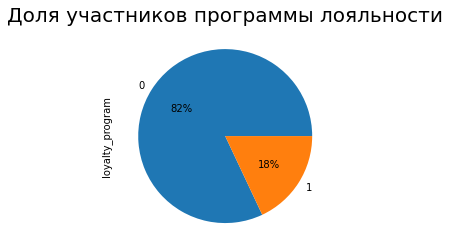

In [39]:
loyalty.plot(kind = 'pie', subplots=True, legend = False, autopct='%1.0f%%')
plt.title('Доля участников программы лояльности', size = 20)
plt.show()

**Доля покупателей с картами лояльности всего 18 %**

Проанализируем клиентов, попробуем выделить наличие корпоративных покупателей

Для определения корпоративных покупателей так же не будем использовать неидентифицированных пользователей, основываясь на предположении, что такие пользователи совершили не более 1 покупки. Удалим их при построении графика.

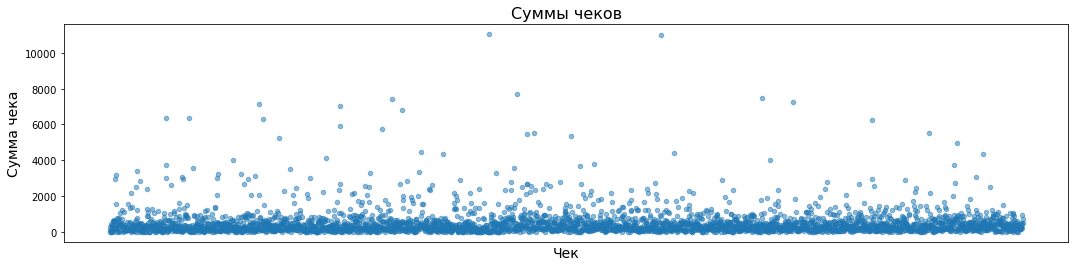

In [40]:
retail_check.plot(x='purchase_id', y='price_sum', figsize =(18,4), kind='scatter', alpha = 0.5)
plt.title('Суммы чеков', size = 16)
plt.xticks([]) # убиараем подписи по оси х
plt.ylabel('Сумма чека', size = 14)
plt.xlabel('Чек', size = 14)
plt.show()

Посчитаем какие значения сумм чеков соответсвуют 95, 97,5 и 99 перцентилю.

In [41]:
print(np.percentile(retail_check['price_sum'], [95,97.5, 99])) 

[1601.389  2410.0915 3585.1408]


Сделаем допущение, что оптовые\корпоративные клиенты, попадают в 2,5% покупателей с наибольшей суммой чеков. В реальном исследовании необходимо учточнить у заказчика эту информацию, т.к. могут иметься данные о том, кто является корпоративным клиентом.
Удалим данные по оптовым клиентам, т.к. они могут существенно искажать данные за счет занчительных объемов заказов.


In [42]:
corp_customer_sum = np.percentile(retail_check['price_sum'], 97.5)
retail_check = retail_check.query('price_sum < @corp_customer_sum')

In [43]:
# Определим даты начала и окончания эксперимента
print(f'Дата начала исследования', retail['purchase_date'].min())
print(f'Дата окончания исследования', retail['purchase_date'].max())

Дата начала исследования 2016-12-01 08:26:00
Дата окончания исследования 2017-02-28 17:04:00


Сравним количество и суммы заказов на различных временных промежутках (дням/неделям)

Для того, чтобы показать подневные продажи с учетом выходных дней созаддим датафрейм с полным списком дат в промежутке аншего иссследования и присоединим его к таблице с чеками

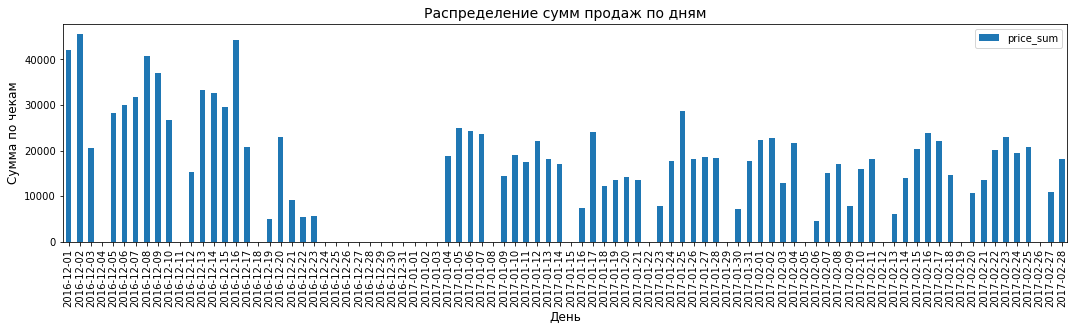

In [44]:
retail_check['date'] = pd.to_datetime(retail_check['purchase_date'].dt.date) # выделим только дату без времени

# Создадим датафрейм с датами в интервале нашего исследования
date_full = pd.date_range(retail_check['date'].min(), retail_check['date'].max()).to_frame(index=False, name ='date_full')

# Объединим с нашим датафреймом чеков
retail_check = retail_check.merge(date_full, left_on = 'date', right_on = 'date_full', how = 'right')

retail_check['date_full'] = retail_check['date_full'].dt.date

# построим подневный график
retail_check.groupby('date_full').agg({'price_sum': 'sum'}).plot(kind = 'bar', figsize =(18, 4))
plt.title('Распределение сумм продаж по дням', size = 14)
plt.ylabel('Сумма по чекам', size = 12)
plt.xlabel('День', size = 12)
plt.show()

В подневных продажах, с учетом выходным видны идентичные колебания, причем в декабре дневные продажи выше, чем в январе и феврале, кроме того с 24 декаря по 3 января продаж нет, что может быть связано с рождественскими/новогодними праздниками.

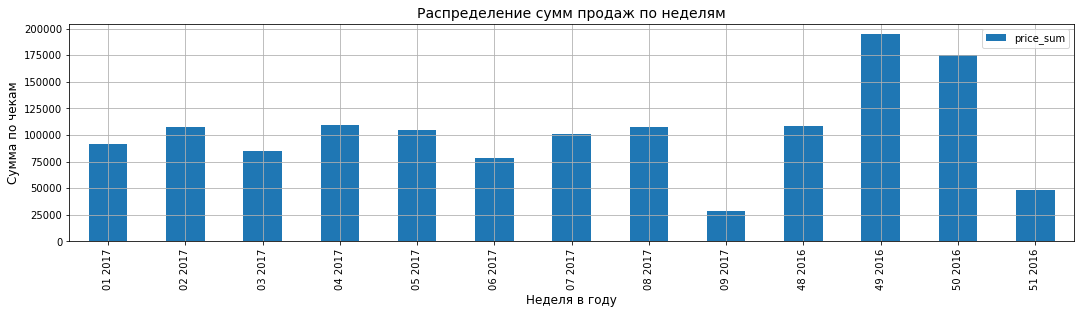

In [45]:
retail_check['week'] = retail_check['purchase_date'].dt.strftime('%U %Y')
retail_check_week = retail_check.groupby('week')\
                                    .agg({'price_sum': 'sum'})
retail_check_week.plot(kind='bar', figsize =(18, 4), grid = True)
plt.title('Распределение сумм продаж по неделям', size = 14)
plt.ylabel('Сумма по чекам', size = 12)
plt.xlabel('Неделя в году', size = 12)
plt.show()

Продажи в декабре выше чем в январе и феврале. Учитывая меньшее количество дней в феврале чем в январе можно считать что среднедневные продажи близки.

## 4. Анализ программы лояльности: <a id="cell6"></a>  <font size = 2>[к оглавлению](#cell0)</font>

Найдем средний чек и среднее количество товара по магазину `shop_0` в разрезе покупателей участвующих в программе лояльности и нет.

In [46]:
average_check = retail_check.groupby('loyalty_program')\
                                    .agg({'price_sum': 'mean',
                                          'quantity': 'mean'})#.reset_index()
average_check

,price_sum,quantity
loyalty_program,,
0.0,436.717963,145.748009
1.0,379.335549,130.094884


Средний чек, так и количество заказов в группе покупателей не участвующей в программе лояльности выше, чем в группе, участвующих в программе лояльности.

Paccчитаем пожизненную ценность (LTV) для категорйи в прамках программы лояльности. добавим к 

In [47]:
print('LTV участников программы лояльности :', retail_customer.query('loyalty_program == 1')['price_sum'].sum()\
                                              /retail_customer.query('loyalty_program == 1')['customer_id'].count())
print('LTV покупателей не участвующих в программе лояльности :', retail_customer.query('loyalty_program == 0')['price_sum'].sum()\
                                              /(retail_customer.query('loyalty_program == 0')['customer_id'].count()))
print('LTV больше в:',(retail_customer.query('loyalty_program == 1')['price_sum'].sum()\
                                              /retail_customer.query('loyalty_program == 1')['customer_id'].count())\
                                              /(retail_customer.query('loyalty_program == 0')['price_sum'].sum()\
                                              /(retail_customer.query('loyalty_program == 0')['customer_id'].count())), 'раз')

LTV участников программы лояльности : 884.8356454545454
LTV покупателей не участвующих в программе лояльности : 473.4949640861931
LTV больше в: 1.868732959308673 раз


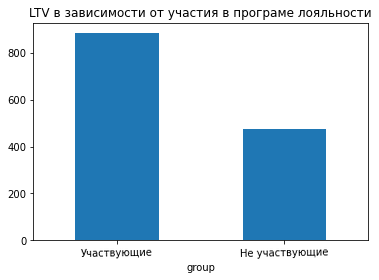

In [48]:
ltv = pd.DataFrame([retail_customer.query('loyalty_program == 1')['price_sum'].sum()\
          /retail_customer.query('loyalty_program == 1')['customer_id'].count(),\
     retail_customer.query('loyalty_program == 0')['price_sum'].sum()\
          /(retail_customer.query('loyalty_program == 0')['customer_id'].count())])
ltv['group']= ['Участвующие','Не участвующие']
ltv = ltv.set_index('group')
ltv.plot(kind = 'bar', legend = False, title = 'LTV в зависимости от участия в програме лояльности', rot = 1)
plt.show()

**Вывод по анализу программы лояльности:** Средний чек, так и количество заказов в группе покупателей не участвующей в программе лояльности выше, чем в группе, участвующих в программе лояльности.

При этом LTV участников программы лояльности выше на 87% относительно LTV покупателей не участвующих в программе лояльности. соответственно участники программы лояльности несмотря на меньший средний чек приносят больше выручки с течением времени.

## 5. Проверка статистических гипотез:   <a id="cell7"></a>  <font size = 2>[к оглавлению](#cell0)</font>  

Проверку на одновременное в группу программы лояльности и без мы провели в предобрадотке данных, соотвественно можно производить сравнение групп.  При проверке гипотез будем применять непараметрический тест Уилкоксона-Манна-Уитни, так как нами зафиксированы выбросы, а данный метод как раз подходит при их наличии. Уровень alpha зададим в размере 0.05.

Ранее мы рассчитали, что средний чек и среднее количество товаров в чеке покупателей, участвующих в программе лояльности ниже, чем у остальных покупателей.
Сформулируем гипотезы:

**Гипотеза 1:** 

`H0 Нулевая` - средний чек участников программы статистически не отличается от остальных покупателей,

`H1 Альтернативная` - средний чек участников программы лояльности меньше, чем у остальных покупателей

In [49]:
alpha = 0.05
results = (stats.mannwhitneyu(retail_check[retail_check['loyalty_program']==0]['price_sum'],\
                              retail_check[retail_check['loyalty_program']==1]['price_sum'], True, 'greater'))

print(('Средний чек покупателей участвующих в программе лояльности ниже среднего чека не участвующих\
 покупателей на ' "{0:.1f}"\
       .format((retail_check[retail_check['loyalty_program']==1]['price_sum'].mean()\
                /retail_check[retail_check['loyalty_program']==0]['price_sum'].mean()-1)*100)), '%')

print('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Средний чек покупателей участвующих в программе лояльности ниже среднего чека не участвующих покупателей на -13.1 %
p-значение:  0.024843380549559403
Отвергаем нулевую гипотезу: разница статистически значима


**Гипотеза 2:** 

`H0 Нулевая` - среднее количество заказов у участников программы лояльности не отличается от остальных покупателей,

`H1 Альтернативная` - среднее количество заказов у участников программы лояльности ниже, чем у остальных покупателей

In [50]:
results = (stats.mannwhitneyu(retail_check[retail_check['loyalty_program']==0]['quantity'],\
                              retail_check[retail_check['loyalty_program']==1]['quantity'], True, 'greater'))

print(('Среднее кол-во заказов покупателей участвующих в программе лояльности ниже среднего кол-ва заказов\
 не участвующих покупателей на ' "{0:.1f}"\
       .format((retail_check[retail_check['loyalty_program']==1]['quantity'].mean()\
                /retail_check[retail_check['loyalty_program']==0]['quantity'].mean()-1)*100)), '%')

print('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Среднее кол-во заказов покупателей участвующих в программе лояльности ниже среднего кол-ва заказов не участвующих покупателей на -10.7 %
p-значение:  0.11742747936725223
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод по анализу статистических гипотез:** 
- В результате анализа получилось, что средний чек покупателей участвующих в программе лояльности статистически значимо ниже среднего чека не участвующих покупателей на -13.1 %
- Среднее кол-во заказов покупателей участвующих в программе лояльности статистически значимо не отличается от среднего кол-ва заказов не участвующих в программе лояльности покупателей 

## 6. Итоги исследования (выводы и рекомендации) <a id="cell8"></a>  <font size = 2>[к оглавлению](#cell0)</font>
 - Подавляющее число покупок, а так же число участников по программе лояльности приходится на магазин `shop 0`. Фактически  программа лояльности реализована толоко в этом магазине. Кроме того, количество покупок в других магазинах несопоставимо с `shop 0`, возможно это пункты выдачи, либо магазины-партнеры. Соответсвенно, наш анализ проведился по магазину `shop 0`.
 

- В результате анализа получилось, что средний чек покупателей участвующих в программе лояльности статистически значимо ниже среднего чека не участвующих покупателей на -13.1 %.


- Среднее кол-во заказов покупателей участвующих в программе лояльности статистически значимо не отличается от среднего кол-ва заказов не участвующих в программе лояльности покупателей


- **LTV участников программы лояльности выше на 87% относительно LTV покупателей не участвующих в программе лояльности. Cоответсвенно участники программы лояльности несмотря на меньший средний чек приносят больше выручки с течением времени.**

**Рекомендации по итогам проведенного анализа:** 


- Провести анализ на большем объеме данных (за больший срок), учитывая, что после очистки данных пришлось удалить значительный объем.


- В таблице продуктов в  дальнейшем при сборе данных целесообразно фиксировать дату присвоения цены, а также делать привязку цены к программе лояльности, если она идет со скидкой.


- В реальном исследовании необходимо разобраться с заказчиком на конкретных примерах, что вызвало попадание в данные товаров и чеков с нулевым(отрицательным) количеством или стоимостью.   